# Predictive Analytics on Airbnb Listed Prices in Melbourne

---

## Table of Contents
**1. Problem Description and Initial Data Analysis**

    1.1. Problem Statement
    1.2. Dataset Description 
    1.3. Methology
    1.4. Data Summary and Main Data Characteristics 
**2. Import Instruction**

    2.1. Import train, test dataset and merge it together
    2.2. Library and packages 

**3. Data Preparation**

    3.1. Clean all numerical features and the target variable price so that they can be used in training algorithms (as a regular feature).
    3.2. Clean all features that contains multiple items of information, e.g. creating email, phone, work_email, etc. from feature host_verifications.
    3.3. Impute missing values for all features in both training and test datasets. 
    3.4. Encode all categorical variables appropriately.
    3.5. Create dummy variables on amenities feature. 

**4. Fit and Tune Forecasting Model**

      4.1. Creating train, test data set and standardising x_train and x_test. 
      4.2. K-Nearest Neighbours Model
      4.3. Random Forest Regressor Model
      4.4. Decision Tree Regressor Model\
      4.5. Multi-layer Neural Network Model
      4.6. Ridge Model
      4.7. Lasso Model
      4.8. Support Vector Regression Model
      4.9. Support Vector Regression Model
  
 **5. Results**
 
     5.1. Kaggle RMSE on different models
     5.2. Final Score, Rank and Conclusion


---

## 1. Problem Description and Initial Data Analysis


**Problem Statement**

In this project, we try to predict the prices of Airbnb listings in Melbourne based on the characteristics of the properties. 

The **goal is to develop accurate and reliable forecasting models that can estimate the prices of the listings using the provided dataset**. 

In the real world, accurate price forecasting for Airbnb listings can have significant implications for both hosts and guests. For hosts, it help them set competitive prices, optimize their revenue, and attract potential guests. For guests, it helps them evaluate affordability, compare listings, and make informed decisions for optimal accommodation choices that provide the best value for their money. Additionally, the techniques and methodologies used in this assignment can be extended to other similar domains where price forecasting plays a crucial role. 

**Dataset Description**

In [ ]:
https://www.kaggle.com/competitions/analytics-group-assignment-s1-2023/data 

In [6]:
# Merge train and test dataset 
import pandas as pd
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df = pd.concat([df_test, df_train], ignore_index=True)

**Methology**

The evaluation criterion used to assess forecast performance is the Root Mean Squared Error (RMSE), which measures the accuracy of predictions by calculating the square root of MSE (Mean Square Error), which is the average squared differences between predicted and atual property prices. **Lower RMSE scores indicate better performance, as it shows that the predicted prices are closer to the actual price.**

The RMSE (Root Mean Square Error) equation is given by:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (predicted_i - actual_i)^2}
$$ or $$
RMSE = \sqrt{MSE}
$$

→ For the **train dataset**, the MSE can get by using ‘cross_val_score’, the function of scikit-learn library to perform cross-validation on a given model. then we use it to calculate RMSE 

→ For the **test dataset**, we don’t have y_test (which is acutal value) so we submit on Kaggle to get the RMSE. 

**Data Summary and Main Data Characteristics**


Overall, the train dataset consists of 7,000 entries and 61 variables, while the test dataset has 3,000 entries and 60 variables. The only variable that differs between the two datasets is the target variable, 'price'. 

Based on the metadata, the variables can be grouped into 7 categories, each with the potential to affect the price:

**1.Listing Information:** Variables in this category, including ID, name, description, and neighborhood_overview, may not have a direct impact on price prediction. However, they can provide additional context or descriptive information about the listing, which can be considered in combination with other variables. 

**2.Host Information:** Variables related to the host, including host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, and host_identity_verified, can influence the price. **Key variables in this category that are important and may affect the price: 'host_since', 'host_listings_count'.** The experience of a host can be inferred from their "host_since" information, while the number of listings they have ("host_listings_count") may influence the perceived value of a listing, potentially affecting its price. 

**3.Location Information:** Variables including neighbourhood, neighbourhood_cleansed, latitude, and longitude can play a significant role in determining the price. **Key variables in this category that are important and may affect the price: 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'logitude'. 

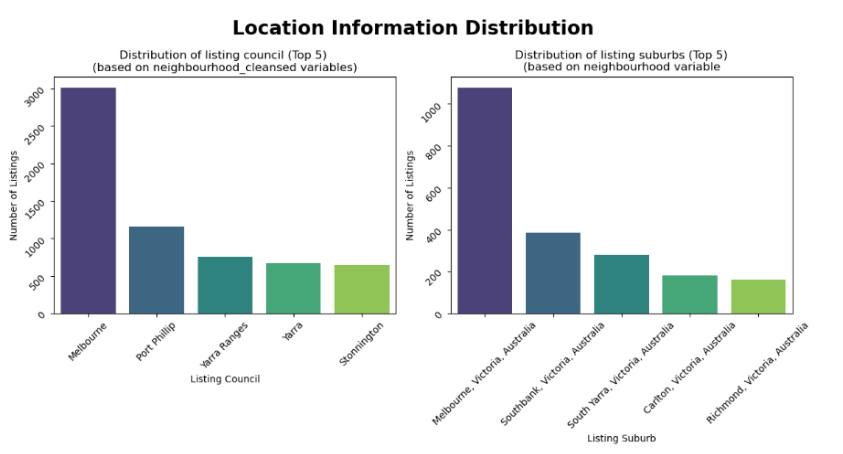

The **‘neighbourhood’ let us know the suburb of listing**, it has 452 unique value, which means that our listings are in a diverse range of locations in Victoria, Australia.  Some neighborhoods appear more frequently in the dataset, indicating a higher concentration of listings in those areas. For example, "Melbourne, Victoria, Australia" is the most common neighborhood with 1076 occurrences, followed by "Southbank, Victoria, Australia" with 385 occurrences.

The **‘neighbourhood_cleansed’ let us know the council of listing**. Some councils appear more frequently in the dataset, indicating a higher concentration of listings in those areas. For example, Melbourne with 3007 occurrences and Port Phillip with 1163 occurrences.

**4.Property Details:** Variables related to the property itself, including property_type, room_type, accommodates, bathrooms, bedrooms, beds, and amenities, can have a direct impact on the price. Different types of properties, larger capacities, more bedrooms or bathrooms, and the presence of desirable amenities can influence the price positively. **Key variables in this category that are important and may affect the price: 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds'.** 

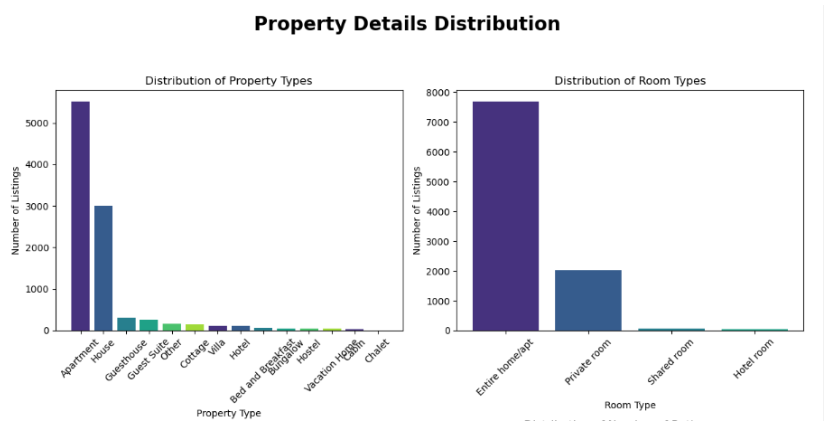
Our listings have diverse property types but mainly apartments and Houses. Room types (both houses/apartments and private rooms) are taking the lead.

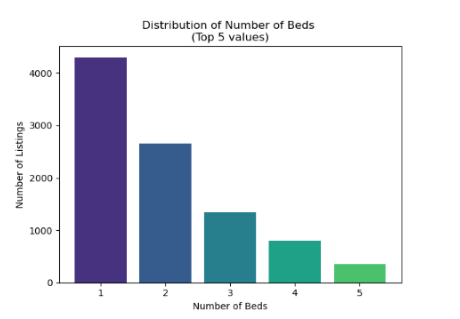

The majority of the listings offer one or two bedrooms, beds, and bathrooms. 

**5.Availability and Booking:** Variables in this category, including minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, and availability_365, may not directly affect the price. However, they can indirectly influence it. For example, longer minimum or maximum stay requirements may affect the perceived value and pricing of a listing.

**6.Review Information:** Variables related to reviews, such as number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, and reviews_per_month, can provide insights into the quality and popularity of the listing. **Key variables in this group that are important and may affect the price are 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', and 'reviews_per_month'.** These variables reflect the feedback and ratings provided by guests, which can impact the perceived value of the listing.

**7.Booking Details:** Variables such as instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, and calculated_host_listings_count_shared_rooms may not directly impact the price prediction. However, they can provide information about the booking process and the host's hosting strategy, which can be considered as additional factors.

## 2. Import Instruction 

Below are instructions for downloading and merging datafiles and all packages used for this project are listed below.


**2.1 Import train, test dataset and merge it together**

In [1]:
# Merge train and test file 
import pandas as pd
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df = pd.concat([df_test, df_train], ignore_index=True)

**2.2 Libraries and packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind


from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

**There are two ways for handling location features:**
- **First way:**

In [ ]:
# !pip install geocoder

In [ ]:
# #the two blocks of code helps inpute missing values for neighbourhood and neighbourhood_cleansed using geopy function
# #this takes a LONG time (~2 hours) therefore, we have processed this for you and made it into a csv called updatedoutput and therefore, commented this out
# # #feel free to run it but remove the df = pd.read_csv("analytics-group-assignment-s1-2023/updatedoutput.csv")

# from geopy.geocoders import Nominatim
# from geopy.point import Point

# geolocator = Nominatim(user_agent='myGeocoder') 
 
# def get_suburb_info(row): 
#     lat = row['latitude']
#     long = row['longitude']
#     location = geolocator.reverse(Point(lat, long), exactly_one=True, timeout = 5) #create lat and long into a geopy point
#     if location:
#         address = location.raw.get('address') #find the dictionary of address
#         suburb = address.get('suburb') #extract suburb
#         town = address.get('town') #if not suburb then town then city district etc.
#         city_district = address.get('city_district') 
#         village = address.get('village')
#         hamlet = address.get('hamlet')
#         if suburb: 
#             return suburb
#         elif town:
#             return town
#         elif city_district:
#             return city_district
#         elif village:
#             return village
#         elif hamlet:
#             return hamlet
#         return 0

# df['suburb'] = df.apply(get_suburb_info, axis=1, result_type='expand')

In [ ]:
# def get_council_info(row):
#     lat = row['latitude']
#     long = row['longitude']
#     location = geolocator.reverse(Point(lat, long), exactly_one=True, timeout = 5)
#     if location:
#         address = location.raw.get('address') 
#         municipality = address.get('municipality') #extracting council which is called municipality
#         return municipality
#     else:
#         return None
# df['municipality'] = df.apply(get_council_info, axis=1, result_type='expand')

- **Second way:**

In [ ]:
#remove this line if decide to run code above
df = pd.read_csv('updatedoutput.csv')

## 3. Data Preparation

**3.1 Clean all numerical features and the target variable price so that they can be used in training algorithms (as a regular feature).**

In [ ]:
# remove % sign for host_response_rate and host_acceptance_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100

# remove $ sign for price target variable
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

# convert the string half/Half to a number 0.5
df['bathrooms'] = df['bathrooms'].str.replace('half', '0.5 half')
df['bathrooms'] = df['bathrooms'].str.replace('Half', '0.5 half')
df['Bath Type'] = df['bathrooms'].astype(str).apply(lambda x: 'Shared' if 'hared' in x else ('Private' if 'rivate' in x else 'Normal'))
df['bathrooms'] = df['bathrooms'].str.extract('(\d+\.?\d*)').astype(float)

Explanation: 
1. when we looked the data, we observe that the variable host_response_rate, host_acceptance_rate have the percentage sign, and price has the dollar sign. We extract numerical values by removing the percentage sign and dollar sign.
2. Then we observe for bathroom feature, some value recorded as half/Half, so we convert the text to a number 0.5 and eliminate text for the bathroom column.

**3.2 Clean all features that contains multiple items of information, e.g. creating email, phone, work_email, etc. from feature host_verifications.**

In [ ]:
# creating 4 new features from host_verification feature
df['email_verified'] = df['host_verifications'].apply(lambda x: 'email' in x).astype(int)
df['phone_verified'] = df['host_verifications'].apply(lambda x: 'phone' in x).astype(int)
df['work_email_verified'] = df['host_verifications'].apply(lambda x: 'work_email' in x).astype(int)
df['num_verifications'] = df['host_verifications'].apply(lambda x: len(x.split(',')) if x else 0)
# print(df['host_verifications'])
# print(df.head())

In [ ]:
# split amenities into separate values and create a new row for each value
amenities = df['amenities'].str.split(', ')
amenities = amenities.explode()

# count the frequency of each value
value_counts = amenities.value_counts()
# print the top 5 most frequent items
print(value_counts.head(5))

df['has_Kitchen'] = df['amenities'].str.contains('Kitchen', regex=False).astype(int)
df['has_Smoke alarm'] = df['amenities'].str.contains('Smoke alarm', regex=False).astype(int)
df['Hangers'] = df['amenities'].str.contains('Hangers', regex=False).astype(int)
df['Wifi'] = df['amenities'].str.contains('Wifi', regex=False).astype(int)
df['Iron'] = df['amenities'].str.contains('Iron', regex=False).astype(int)
# print(df)

Explanation: 

When we observe the dataset, we observe the **host_verification and amenities** holding mulitple items. For the host_verification, I divided the 3 verifications to different features as dummy variable. As for the amenities feature has a lot more items, so I select the top 5 most frequent items in the amenities and divide them into different features as dummy variables.

**3.3 Impute missing values for all features in both training and test datasets.**

Explanation: 

##### Addressing missing values
- **Handling location** - Geopy

('neighbourhood', 'neighbourhood_cleansed')
- **Handling text variables** - fill in 'no informaiton'

('name', 'description', 'neighborhood_overview', 'host_about'
- **Fill missing values in categorical variables** - using most frequent values in training dataset 

('host_response_time', 'host_is_superhost','host_location', 'host_neighbourhood', 'property_type', 'room_type')
- **Fill missing values in numerical variables** - using mean values in training dataset

('host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_maximum_nights', 'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month')
- **FIll missing values for date type** - same value as the followed non-null value

('first_review', 'last_review')

**Checking missing values**

In [ ]:
print('No. of null value in each variable\n',df.loc[:, 'ID':'reviews_per_month'].isnull().sum())

**Addressing missing values**
- **Handling location**

('neighbourhood', 'neighbourhood_cleansed')

In [ ]:
#clean suburb to matches neighbourhood cleansed 
df['municipality'] = df['municipality'].str.replace('City of ', '')
df['municipality'] = df['municipality'].str.replace('Shire of ', '')
df['neighbourhood'] = df['suburb'] #makes the neighbourhood  column = suburb
df['neighbourhood_cleansed'].fillna(df['municipality'], inplace=True) #use the municipality to replace na values for neighbourhood_cleansed
# print('No. of null value in each variable\n',df.loc[:, 'ID':'reviews_per_month'].isnull().sum())

- **Handling text variables**

('name', 'description', 'neighborhood_overview', 'host_about')

In [ ]:
# Fill the missing value in name, description, neighborhood_overview, and host_about with 'no information'
df['name'] = df['name'].fillna('no information')
df['description'] = df['description'].fillna('no information')
df['neighborhood_overview'] = df['neighborhood_overview'].fillna('no information')
df['host_about'] = df['host_about'].fillna('no information')
# print('No. of null value in name variable\n',df['name'].isnull().sum())
# print('No. of null value in description variable\n',df['description'].isnull().sum())
# print('No. of null value in neighborhood_overview variable\n',df['neighborhood_overview'].isnull().sum())
# print('No. of null value in host_about variable\n',df['host_about'].isnull().sum())

- **Fill missing values in categorical variables**

('host_response_time', 'host_is_superhost','host_location', 'host_neighbourhood', 'property_type', 'room_type')

In [ ]:
# Divide the training dataset and test dataset
df_train_clean = df.iloc[:7000]
# print(df_train_clean)
df_test_clean = df.iloc[7000:]
# print(df_test_clean)


# Fill in the missing values in categorical variables with the most frequent values
from scipy.stats import mode
columns_to_process = ['host_response_time', 'host_is_superhost','host_location', 'host_neighbourhood', 'property_type', 'room_type']

modes = df_train_clean[columns_to_process].mode(axis=0)
for column in columns_to_process:
    df[column].fillna(modes[column][0], inplace = True)

- **Fill missing values in numerical variables**

('host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_maximum_nights', 'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month')

In [ ]:
# Fill in the missing values in numerical variables with the mean value
columns_to_fill_mean = ['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_maximum_nights', 'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

for column in columns_to_fill_mean:
    df[column].fillna(df_train_clean[column].mean(), inplace = True)   
# print('No. of null value in each variable\n',df.loc[:, 'ID':'reviews_per_month'].isnull().sum())

- **FIll missing values for date type** 

('first_review', 'last_review')

In [ ]:
# convert date column to datetime type
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
# impute missing values with the following date value
df['first_review'] = df['first_review'].fillna(method='ffill')
df['last_review'] = df['last_review'].fillna(method='ffill')
# print(df['first_review'])

# print('No. of null value in date variable\n',df['first_review'].isnull().sum())

# print('No. of null value in each variable\n',df.loc[:, 'ID':'reviews_per_month'].isnull().sum())

**3.4 Encode all categorical variables appropriately.**

Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

In [ ]:
##Checking: 
print(df[['host_location', 'host_verifications', 'neighbourhood', 'property_type', 'host_neighbourhood','neighbourhood_cleansed', 'room_type', 'host_response_time']].nunique())

#### Variables need to encode: 
**property_type, host_location, neighbourhood, host_neighbourhood, and neighbourhood_cleansed**
- One-hot encoding
Since these are nominal categorical variables merge all encoded variables to the original dataset. 

In [ ]:
most_frequent = 5  # Number of most frequent values to keep

# Get value counts of the property_type feature
property_type_counts = df['property_type'].value_counts()

# print(property_type_counts)

# Select the top 5 values and 'other'
top_values_property = property_type_counts.head(most_frequent).index.tolist()
top_values_property.append('other')

# print(top_values_property)

df['property_type_mapped'] = df['property_type'].map(lambda x: x if x in top_values_property else 'other')

# print(df['property_type_mapped'])

# Perform one-hot encoding
encoded_property = pd.get_dummies(df['property_type_mapped'], prefix='property_type')
# print(encoded_property)



# Get value counts of the host_location feature
host_location_counts = df['host_location'].value_counts()

# print(host_location_counts)

# Select the top N values and 'other'
top_values_host = host_location_counts.head(most_frequent).index.tolist()
top_values_host.append('other')

# print(top_values_host)

df['host_location_mapped'] = df['host_location'].map(lambda x: x if x in top_values_host else 'other')

# print(df['host_location_mapped'])

# Perform one-hot encoding
encoded_host = pd.get_dummies(df['host_location_mapped'], prefix='host_location')
# print(encoded_host)



# Get value counts of the neighborhood feature
nbr_counts = df['neighbourhood'].value_counts()

# print(nbr_counts)

# Select the top N values and 'other'
top_values_nbr = nbr_counts.head(most_frequent).index.tolist()
top_values_nbr.append('other')

# print(top_values_host)

df['nbr_mapped'] = df['neighbourhood'].map(lambda x: x if x in top_values_nbr else 'other')

# print(df['host_location_mapped'])

# Perform one-hot encoding
encoded_nbr = pd.get_dummies(df['nbr_mapped'], prefix='neighbourhood')
# print(encoded_nbr)



# Get value counts of the host_neighborhood feature
host_nbr_counts = df['host_neighbourhood'].value_counts()

# print(host_nbr_counts)

# Select the top N values and 'other'
top_values_host_nbr = host_nbr_counts.head(most_frequent).index.tolist()
top_values_host_nbr.append('other')

# print(top_values_host_nbr)

df['host_nbr_mapped'] = df['host_neighbourhood'].map(lambda x: x if x in top_values_host_nbr else 'other')

# print(df['host_nbr_mapped'])

# Perform one-hot encoding
encoded_host_nbr = pd.get_dummies(df['host_nbr_mapped'], prefix='host_neighbourhood')
# print(encoded_host_nbr)



# Get value counts of the neighbourhood_cleansed feature
nbr_cln_counts = df['neighbourhood_cleansed'].value_counts()

# print(nbr_cln_counts)

# Select the top N values and 'other'
top_values_nbr_cln = nbr_cln_counts.head(most_frequent).index.tolist()
top_values_nbr_cln.append('other')

# print(top_values_nbr_cln)

df['nbr_cln_mapped'] = df['neighbourhood_cleansed'].map(lambda x: x if x in top_values_nbr_cln else 'other')

# print(df['nbr_cln_mapped'])

# Perform one-hot encoding
encoded_nbr_cln = pd.get_dummies(df['nbr_cln_mapped'], prefix='neighbourhood_cleansed')
# print(encoded_nbr_cln)


# merge all encoded variables to the original dataset
df = pd.concat([df, encoded_property, encoded_host, encoded_nbr, encoded_host_nbr, encoded_nbr_cln], axis = 1)

**3.5 Create dummy variables on amenities feature**

In [ ]:
Intuitively, we think the balcony, private_balcony, courtyard_view, vineyard_view, TV and AC are affecting the price.

Also, the bathroom types can influence the price. Three bathroom types defined previously (normal bathroom, private bathroom, public bathroom)

In [ ]:
# count how many items for each Airbnb service
amenities_count = df['amenities'].str.split(', ').apply(len)
df['amenities_count'] = amenities_count
print(amenities_count)
# print(df.head())

In [ ]:
# select some variable items from amenities in each Airbnb house and make dummy variables
df['has_balcony'] = df['amenities'].str.contains('patio or balcony|Patio or balcony', case=False, regex=True).astype(int)
df['has_private_balcony'] = df['amenities'].str.contains('Private patio or balcony', case=False, regex=True).astype(int)
df['has_courtyard_view'] = df['amenities'].str.contains('Courtyard view', case=False, regex=True).astype(int)
df['has_vineyard_view'] = df['amenities'].str.contains('Vineyard view', case=False, regex=True).astype(int)
df['has_TV'] = df['amenities'].str.contains('TV', case=False, regex=False).astype(int)
df['has_AC'] = df['amenities'].str.contains('AC|Air conditioning', case=False, regex=True).astype(int)
# print(df)

In [ ]:
# encode each bath type (normal bath, private bath, shared bath)
pd.get_dummies(df['Bath Type'], prefix='Bath Type')
encoded_bath_type = pd.get_dummies(df['Bath Type'], prefix='Bath Type')
print(encoded_bath_type)

df = pd.concat([df, encoded_bath_type], axis = 1)

**3.6 Perform exploratory data analysis to measure the relationship between the features and the target**

In [ ]:
# print(df.dtypes.unique())
df_clean = df.select_dtypes(include=['int64', 'float64', 'int32'])
# print(df_clean)


# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Filter features based on correlation threshold

# Print the strongly correlated features
print(abs(correlation_matrix['price']).sort_values(ascending=False).head(25))

In [ ]:
# Filter features based on correlation threshold
correlation_threshold = 0.015  # Adjust the threshold as per your requirement
strong_correlated_features = correlation_matrix[abs(correlation_matrix['price']) > correlation_threshold]['price']

# Print the strongly correlated features
print(abs(strong_correlated_features).sort_values(ascending=False))

# Select the strong correlated features and use them as input for traning and testing
df_final = df_clean[['bedrooms','accommodates', 'minimum_minimum_nights', 'bathrooms', 'beds', 'availability_365', 'minimum_nights_avg_ntm', 'availability_30', 'reviews_per_month', 'maximum_nights', 'minimum_nights', 'email_verified', 'maximum_minimum_nights', 'has_TV', 'number_of_reviews_ltm', 'num_verifications', 'number_of_reviews','number_of_reviews_l30d','price']]

df_train_final = df_final.iloc[:7000]
# print(df_train_final)
df_test_final = df_final.iloc[7000:]
# print(df_test_final)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlations between selected features and the target
correlation_matrix_plot = df_final.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix_plot, annot=True, cmap='coolwarm', vmin = -0.1, vmax = 0.1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.pairplot(df_final)

plt.show()

We tried to select all numerical variables which has int64, float32, int32 and uint8. We iterate through data cleaning, feature engineering, and exploration steps to refine the dataset. After tried different errors, We found that the variables with int64, float32 and int32 with variables correlation greater than 0.015 gave us the best result. The resulting dataset will be used for training and evaluating the predictive models.

Selected features as follows: ('bedrooms','accommodates', 'minimum_minimum_nights', 'bathrooms', 'beds', 'availability_365', 'minimum_nights_avg_ntm', 'availability_30', 'reviews_per_month', 'maximum_nights', 'minimum_nights', 'email_verified', 'maximum_minimum_nights', 'has_TV', 'number_of_reviews_ltm', 'num_verifications', 'number_of_reviews','number_of_reviews_l30d')

Those features do not present a strong linear relationship

## 4. Fit and tune forecasting model

**4.1 Creating train, test data set and standardising x_train and x_test**

In [ ]:
#Creating the train and test dataset
X_train = df_train_final.drop('price', axis=1)
y_train = df_train_final['price']
X_test = df_test_final.drop('price', axis=1)

#standardising x_train and x_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

**4.2 K Nearest Neighbours Model**

In [ ]:
#KNR Model

from sklearn.neighbors import KNeighborsRegressor

#Creating instance of the K Nearest Neighbours model 
knr_model = KNeighborsRegressor()


#Create a dictionary of all values we want to test for n_neighbors
param_grid_knr = {'n_neighbors': np.arange(1, 25)}

#Using GridSearch Cross Validation
grid_search_knr = GridSearchCV(estimator=knr_model, param_grid=param_grid_knr, cv=10, scoring='neg_mean_squared_error')
                               
#Fitting the model with GridSearch
grid_search_knr.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_knr_model = grid_search_knr.best_estimator_
best_params_knr = grid_search_knr.best_params_

print(best_params_knr)

#Fitting the best model on the training data
best_knr_model.fit(X_train_scaled, y_train)
                               

#Predicting the target variable for the test data
y_pred_knr = best_knr_model.predict(X_test_scaled)


#Using fitted model to create price prediction
df_test['price'] = y_pred_knr
                               
#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_knr.csv', index=False)


mse_scores = -cross_val_score(best_knr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_knr = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_knr)

**4.3 Random Forest Regressor Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV


#Defining the parameter grid for tuning hyperparameters
param_grid_rf = {
    'n_estimators': [20, 50, 100],  # number of trees in the forest
    'max_depth': [2, 4, 5],  # maximum depth of the trees
    'min_samples_split': [2,3, 5],  # minimum number of samples required to split an internal node
}


#Creating instance of the Random Forest model
rf_model = RandomForestRegressor(random_state=1)


#Using GridSearch Cross Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, scoring='neg_mean_squared_error')

#Fitting the model with GridSearch
grid_search_rf.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_rf_model = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

#Fitting the best model on the training data
best_rf_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_rf = best_rf_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_rf

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_rf.csv', index=False)


mse_scores = -cross_val_score(best_rf_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_rf = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_rf)

**4.4 Decision Tree Regressor Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


#Defining the parameter grid for tuning hyperparameters
param_grid_dt = {
    'max_depth': [None, 5, 10],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
}

#Creating instance of the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=1)

#Using GridSearch Cross Validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=10, scoring='neg_mean_squared_error')

#Fitting the model with GridSearch
grid_search_dt.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_dt_model = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

print(best_params_dt)

#Fitting the best model on the training data
best_dt_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_dt = best_dt_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_dt

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_dt.csv', index=False)


mse_scores = -cross_val_score(best_dt_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_dt = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_dt)

**4.5 Multi-layer Neural Network Model** 

In [ ]:
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

#Defining the parameter grid for tuning hyperparameters
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

#Creating instance of the MLP model
mlp_model = MLPRegressor(max_iter=30, random_state=1)

#Using GridSearch Cross Validation
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=10, scoring='neg_mean_squared_error')
grid_search_mlp.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_mlp_model = grid_search_mlp.best_estimator_
best_params_mlp = grid_search_mlp.best_params_

print(best_params_mlp)

#Fitting the best model on the training data
best_mlp_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_mlp = best_mlp_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_mlp

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_mlp.csv', index=False)


mse_scores = -cross_val_score(best_mlp_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_mlp = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_mlp)

**4.5 Ridge Model** 

In [ ]:
from sklearn.linear_model import Ridge

#Defining the parameter grid for tuning hyperparameter alpha 
param_grid_rdg = {'alpha':  [1e-15,1e-10,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,5, 10,15,20,25,30,35,40,45,50,55, 100, 110,120,130,140,150,200]}

#Creating instance of the Ridge model
rdg_model = Ridge()

#Using GridSearch Cross Validation
grid_search_rdg = GridSearchCV(estimator=rdg_model, param_grid=param_grid_rdg, cv=10, scoring='neg_mean_squared_error')
grid_search_rdg.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_rdg_model = grid_search_rdg.best_estimator_
best_params_rdg = grid_search_rdg.best_params_
print(best_params_rdg)

#Fitting the best model on the training data
best_rdg_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_rdg = best_rdg_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_rdg

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_rdg.csv', index=False)



mse_scores = -cross_val_score(best_rdg_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_rdg = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_rdg)

**4.6 Lasso Model** 

In [ ]:
from sklearn.linear_model import Lasso

#Defining the parameter grid for tuning hyperparameter alpha levels
param_grid_lso = {'alpha':  [1e-15,1e-10,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,5, 10,15,20,25,30,35,40,45,50,55,100,110,120,130,140,150,200]}

#Creating instance of the Lasso model
lso_model = Lasso(max_iter=30)

#Using GridSearch Cross Validation
grid_search_lso = GridSearchCV(estimator=lso_model, param_grid=param_grid_lso, cv=10, scoring='neg_mean_squared_error')
grid_search_lso.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_lso_model = grid_search_lso.best_estimator_
best_params_lso = grid_search_lso.best_params_
print(best_params_lso)

#Fitting the best model on the training data
best_lso_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_lso = best_lso_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_lso
#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_lso.csv', index=False)



mse_scores = -cross_val_score(best_lso_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_lso = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_lso)

**4.7 Support Vector Regression Model** 

In [ ]:
from sklearn.svm import SVR

#Defining the parameter grid for hyperparameter tuning
param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale']
}
#Creating instance of the SVR model
svr_model = SVR()

#Using GridSearch Cross Validation
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=10, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_svr_model = grid_search_svr.best_estimator_
best_params_svr = grid_search_svr.best_params_

print(best_params_svr)

#Fitting the best model on the training data
best_svr_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_svr = best_svr_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_svr

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_svr.csv', index=False)


mse_scores = -cross_val_score(best_svr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_svr = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_svr)

## 5. Results

**5.1 Kaggle RMSE on different models**

## Kaggle RMSE    
**KNR**: 3334.92689  
**Random Forest**: 3424.03348  
**Decision Tree**: 3454.42914  
**MLP**: 3421.70809  
**Ridge**: 3417.7776  
**Lasso**: 3417.7776  
**SVR**: 3422.39398  

In [ ]:
#Comparison with Kaggle rmse
#Extracting the data from Kaggle Score
data = {'KNR':3334.92689, 'Random Forest':3424.03348 , 'Decision Tree':3454.42914,
        'MLP':3421.70809 , 'Ridge': 3417.7776, 'Lasso':3417.7776, 'SVR': 3422.39398}

#Taking the data from the dictionary created
courses = list(data.keys())
values = list(data.values())

#Creating a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 7))

#Plotting the line chart
ax.plot(courses, values, color='blue', linewidth=2)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Kaggle RMSE')
ax.set_title('Kaggle RMSE Results Using Different Models')

# Display the line chart
plt.show()

In [ ]:
#Extracting the data from Calculated Score
data = {'KNR':rmse_knr,'Random Forest':rmse_rf, 'Decision Tree':rmse_dt,
        'MLP':rmse_mlp , 'Ridge': rmse_rdg, 'Lasso':rmse_lso, 'SVR': rmse_svr}

#Taking the data from the dictionary created
courses = list(data.keys())
values = list(data.values())

#Creating a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 7))

#Plotting the line chart
ax.plot(courses, values, color='green', linewidth=2)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Calculated RMSE Results Using Different Models')

# Display the line chart
plt.show()

**5.2 Final Score, Rank and Conclusion**

Our best score was using the KNR model as shown above which had resulted in the score of 3334.93 (2dp) which will be our chosen submission as shown below.
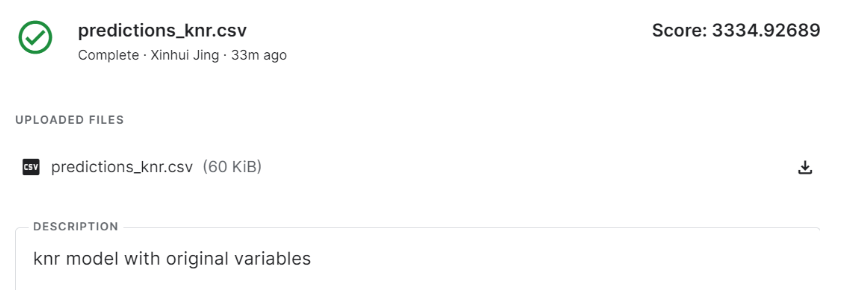
After many experiments with different hyperparameters, adjusted variables for regression and a comparison of the different model's score, we find that KNR results produces the lowest RMSE and thus, our best model. 

However, we see that the RMSE calculated with KNR is the highest for the RMSE calculated using the y_train showing a stark contrast between the two. Furthermore, it seems that MLP, Ridge Lasso and SVR are more consistent with their score fluctuation. Therefore, as our best score on Kaggle is not consistent with the scores calculated here, the models may be overfitted or that the RMSE calculated using y_train is biased as it uses data that has been already seen, or even the model differences. 


Currently rank on Kaggle is Rank 1 as of 1/06/2023 4pm.
